In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb9d2237b6ae29027e3e0f77f22c151


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yangambi
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | samusu
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | slyudyanka
Processing Record 6 of Set 1 | svetlyy yar
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | ratnagiri
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | praya
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | novoilinsk
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | puerto ayora


Processing Record 37 of Set 4 | salinas
Processing Record 38 of Set 4 | camocim
Processing Record 39 of Set 4 | mora
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | harper
Processing Record 42 of Set 4 | korla
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | karpogory
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | zhanaozen
Processing Record 49 of Set 4 | fomboni
Processing Record 50 of Set 4 | hobyo
Processing Record 1 of Set 5 | verkhnyaya inta
Processing Record 2 of Set 5 | bonavista
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | valreas
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | zhireken
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 5 | knyaze-volkonskoye
Processing Record 9 of Set 5 | cabo san lucas
P

Processing Record 24 of Set 8 | siteki
Processing Record 25 of Set 8 | peterhead
Processing Record 26 of Set 8 | marawi
Processing Record 27 of Set 8 | aquin
Processing Record 28 of Set 8 | palu
Processing Record 29 of Set 8 | darnah
Processing Record 30 of Set 8 | shitkino
Processing Record 31 of Set 8 | cocorit
Processing Record 32 of Set 8 | valparaiso
Processing Record 33 of Set 8 | clyde river
Processing Record 34 of Set 8 | katherine
Processing Record 35 of Set 8 | ulladulla
Processing Record 36 of Set 8 | harer
Processing Record 37 of Set 8 | pala
Processing Record 38 of Set 8 | vitim
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | san joaquin
Processing Record 41 of Set 8 | guatire
Processing Record 42 of Set 8 | novyy urengoy
Processing Record 43 of Set 8 | marcona
City not found. Skipping...
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | buta
Processing Record 46 of Set 8 | myitkyina
Processing Record 47 of Set 8 | straumen
Proces

Processing Record 18 of Set 12 | walvis bay
Processing Record 19 of Set 12 | kendari
Processing Record 20 of Set 12 | udachnyy
Processing Record 21 of Set 12 | nakusp
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | capitao poco
Processing Record 24 of Set 12 | jutai
Processing Record 25 of Set 12 | yongan
Processing Record 26 of Set 12 | dzerzhinskoye
Processing Record 27 of Set 12 | labytnangi
Processing Record 28 of Set 12 | egvekinot
Processing Record 29 of Set 12 | fairbanks
Processing Record 30 of Set 12 | sa kaeo
Processing Record 31 of Set 12 | belyy
Processing Record 32 of Set 12 | zhangye
Processing Record 33 of Set 12 | ati
Processing Record 34 of Set 12 | rundu
Processing Record 35 of Set 12 | cao bang
Processing Record 36 of Set 12 | fonte boa
Processing Record 37 of Set 12 | solsvik
City not found. Skipping...
Processing Record 38 of Set 12 | malakal
Processing Record 39 of Set 12 | creutzwald
Processing Record 40 of Set 12 | ruteng
Processing Rec

In [10]:
len(city_data)

565

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yangambi,0.8102,24.4336,87.30,51,91,1.88,CD,2021-04-14 14:30:08
1,Mataura,-46.1927,168.8643,48.99,94,99,1.01,NZ,2021-04-14 14:30:08
2,Ushuaia,-54.8000,-68.3000,48.20,34,75,17.27,AR,2021-04-14 14:28:59
3,Slyudyanka,51.6594,103.7061,29.03,90,95,5.99,RU,2021-04-14 14:30:09
4,Svetlyy Yar,48.4748,44.7810,75.20,16,0,15.66,RU,2021-04-14 14:30:09
5,Kapaa,22.0752,-159.3190,71.60,73,20,13.80,US,2021-04-14 14:30:10
6,Saint-Pierre,-21.3393,55.4781,75.20,83,90,10.36,RE,2021-04-14 14:30:10
7,Ratnagiri,16.9833,73.3000,83.25,75,0,4.36,IN,2021-04-14 14:30:10
8,Busselton,-33.6500,115.3333,54.00,93,28,6.26,AU,2021-04-14 14:30:11
9,Praya,14.9215,-23.5087,82.40,44,0,28.77,CV,2021-04-14 14:30:11


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yangambi,CD,2021-04-14 14:30:08,0.8102,24.4336,87.30,51,91,1.88
1,Mataura,NZ,2021-04-14 14:30:08,-46.1927,168.8643,48.99,94,99,1.01
2,Ushuaia,AR,2021-04-14 14:28:59,-54.8000,-68.3000,48.20,34,75,17.27
3,Slyudyanka,RU,2021-04-14 14:30:09,51.6594,103.7061,29.03,90,95,5.99
4,Svetlyy Yar,RU,2021-04-14 14:30:09,48.4748,44.7810,75.20,16,0,15.66
...,...,...,...,...,...,...,...,...,...
560,Muisne,EC,2021-04-14 14:33:03,0.6000,-80.0333,80.60,94,75,6.91
561,Pemba,MZ,2021-04-14 14:33:03,-12.9740,40.5178,75.20,94,90,8.05
562,Desaguadero,PE,2021-04-14 14:33:03,-16.5656,-69.0417,51.13,61,68,8.28
563,Burns Lake,CA,2021-04-14 14:33:04,54.2331,-125.7533,24.80,93,100,1.14


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

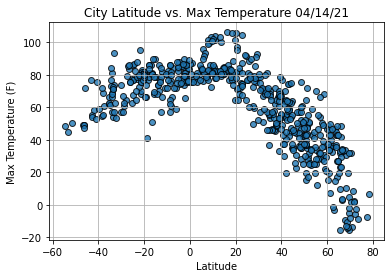

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

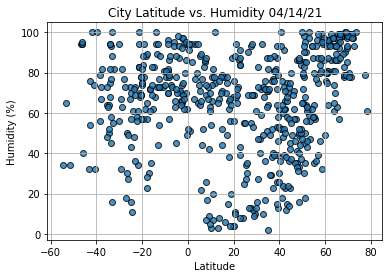

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

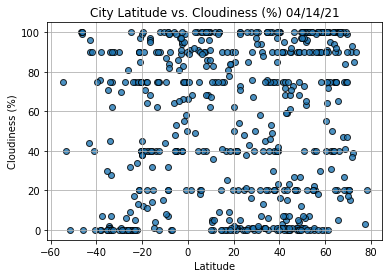

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

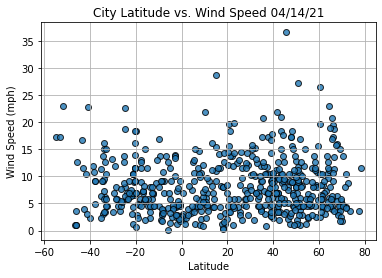

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()